In [1]:
import numpy as np
import numpy.ma as ma
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline
import cartopy.crs as ccrs
import cartopy.feature as cfeature
# import cmocean as cmo
import os.path
# import nc_time_axis

In [2]:
# import the SST climatology created by the bcgen script -- from MW's homedir copied to VC
climo_path = '/glade/u/home/vcooper/work/som2dom/sstice_clim.nc'
ds = xr.open_dataset(climo_path)
print(ds)

<xarray.Dataset>
Dimensions:            (lat: 384, lon: 320, time: 12)
Coordinates:
  * lon                (lon) float64 320.6 321.7 322.8 ... 317.2 318.3 319.4
  * lat                (lat) float64 -79.22 -79.22 -79.22 ... 1e+30 1e+30 1e+30
  * time               (time) object 0000-01-16 12:00:00 ... 0000-12-16 12:00:00
Data variables:
    date               (time) int32 ...
    datesec            (time) int32 ...
    ice_cov            (time, lat, lon) float32 ...
    ice_cov_prediddle  (time, lat, lon) float32 ...
    SST_cpl            (time, lat, lon) float32 ...
    SST_cpl_prediddle  (time, lat, lon) float32 ...
Attributes:
    history:  Wed Nov 20 12:12:19 2019: ncrename -v sst,SST_cpl sstice_clim.n...
    NCO:      netCDF Operators version 4.7.9 (Homepage = http://nco.sf.net, C...


In [3]:
# existing data for prescribed SSTs from env_run.xml
SSTICE_DATA = xr.open_dataset('~/work/som2dom/sst_HadOIBl_bc_1x1_clim_c101029.nc')
SSTICE_DATA

<xarray.Dataset>
Dimensions:            (lat: 180, lon: 360, time: 12)
Coordinates:
  * lon                (lon) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * lat                (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * time               (time) object 0000-01-16 12:00:00 ... 0000-12-16 12:00:00
Data variables:
    date               (time) int32 ...
    datesec            (time) int32 ...
    ice_cov            (time, lat, lon) float32 ...
    ice_cov_prediddle  (time, lat, lon) float32 ...
    SST_cpl            (time, lat, lon) float32 ...
    SST_cpl_prediddle  (time, lat, lon) float32 ...
Attributes:
    history:  2010-10-28 13:32:31 regrid -i /project/amp/hannay/sst4cam3/data...

In [4]:
# existing grid for SSTs from env_run.xml
SSTICE_GRID = xr.open_dataset('~/work/som2dom/domain.ocn.1x1.111007.nc')
SSTICE_GRID

<xarray.Dataset>
Dimensions:  (ni: 360, nj: 180)
Dimensions without coordinates: ni, nj
Data variables:
    yc       (nj) float64 ...
    xc       (ni) float64 ...
Attributes:
    history:  Fri Oct  7 13:06:02 2011: ncrename -d lon,ni -d lat,nj domain.o...

In [5]:
# alternative grid for SSTs from input data
SSTICE_GRIDalt = xr.open_dataset('~/work/som2dom/domain.ocn.gx1v6.090206.nc')
SSTICE_GRIDalt

<xarray.Dataset>
Dimensions:  (ni: 320, nj: 384, nv: 4)
Coordinates:
    xc       (nj, ni) float64 ...
    yc       (nj, ni) float64 ...
Dimensions without coordinates: ni, nj, nv
Data variables:
    xv       (nj, ni, nv) float64 ...
    yv       (nj, ni, nv) float64 ...
    mask     (nj, ni) int32 ...
    area     (nj, ni) float64 ...
    frac     (nj, ni) float64 ...
Attributes:
    title:              CCSM domain data:
    Conventions:        CF-1.0
    source_code:        SVN $Id: gen_domain.F90 6671 2007-09-28 21:56:26Z kau...
    SVN_url:             $URL: https://svn-ccsm-models.cgd.ucar.edu/tools/map...
    history:            created by kauff, 2009-02-06 12:19:28
    source:             /fis/cgd/cseg/csm/mapping/makemaps/fv1.9x2.5_gx1v6_09...
    map_domain_a:       gx1v6, Present DP x1
    map_domain_b:       1.9x2.5 CAM finite volume grid
    map_grid_file_ocn:  /fis/cgd/cseg/csm/mapping/grids/gx1v6_090205.nc
    map_grid_file_atm:  /fis/cgd/cseg/csm/mapping/grids/fv1.9x2.5_060511.nc
    output_file1:       domain.ocn.gx1v6.090206.nc
    output_file2:       domain.lnd.fv1.9x2.5_gx1v6.090206.nc
    user_comment:       Standard CCSM3.1/4.0 domain specification file with f...

In [6]:
# another alternative grid for SSTs from input data
SSTICE_GRIDalt2 = xr.open_dataset('~/work/som2dom/domain.ocn.gx1v7.151008.nc')
SSTICE_GRIDalt2

<xarray.Dataset>
Dimensions:  (ni: 320, nj: 384, nv: 4)
Coordinates:
    xc       (nj, ni) float64 ...
    yc       (nj, ni) float64 ...
Dimensions without coordinates: ni, nj, nv
Data variables:
    xv       (nj, ni, nv) float64 ...
    yv       (nj, ni, nv) float64 ...
    mask     (nj, ni) int32 ...
    area     (nj, ni) float64 ...
    frac     (nj, ni) float64 ...
Attributes:
    title:               CESM domain data:
    Conventions:         CF-1.0
    source_code:         SVN $Id: gen_domain.F90 65202 2014-11-06 21:07:45Z m...
    SVN_url:              $URL: https://svn-ccsm-models.cgd.ucar.edu/tools/ma...
    Compiler_Optimized:  FALSE
    hostname:            yellowstone.ucar.edu
    history:             created by mlevy, 2015-10-08 16:23:19
    source:              ../gen_mapping_files/map_gx1v7_TO_fv0.9x1.25_aave.15...
    map_domain_a:        /glade/p/cesmdata/cseg/mapping/grids/gx1v7_151008.nc
    map_domain_b:        /glade/p/cesmdata/cseg/mapping/grids/fv0.9x1.25_1410...
    map_grid_file_ocn:   /glade/p/cesmdata/cseg/mapping/grids/gx1v7_151008.nc
    map_grid_file_atm:   /glade/p/cesmdata/cseg/mapping/grids/fv0.9x1.25_1410...

In [7]:
SSTICE_GRIDalt2

<xarray.Dataset>
Dimensions:  (ni: 320, nj: 384, nv: 4)
Coordinates:
    xc       (nj, ni) float64 ...
    yc       (nj, ni) float64 ...
Dimensions without coordinates: ni, nj, nv
Data variables:
    xv       (nj, ni, nv) float64 ...
    yv       (nj, ni, nv) float64 ...
    mask     (nj, ni) int32 ...
    area     (nj, ni) float64 ...
    frac     (nj, ni) float64 ...
Attributes:
    title:               CESM domain data:
    Conventions:         CF-1.0
    source_code:         SVN $Id: gen_domain.F90 65202 2014-11-06 21:07:45Z m...
    SVN_url:              $URL: https://svn-ccsm-models.cgd.ucar.edu/tools/ma...
    Compiler_Optimized:  FALSE
    hostname:            yellowstone.ucar.edu
    history:             created by mlevy, 2015-10-08 16:23:19
    source:              ../gen_mapping_files/map_gx1v7_TO_fv0.9x1.25_aave.15...
    map_domain_a:        /glade/p/cesmdata/cseg/mapping/grids/gx1v7_151008.nc
    map_domain_b:        /glade/p/cesmdata/cseg/mapping/grids/fv0.9x1.25_1410...
    map_grid_file_ocn:   /glade/p/cesmdata/cseg/mapping/grids/gx1v7_151008.nc
    map_grid_file_atm:   /glade/p/cesmdata/cseg/mapping/grids/fv0.9x1.25_1410...

In [8]:
ds

<xarray.Dataset>
Dimensions:            (lat: 384, lon: 320, time: 12)
Coordinates:
  * lon                (lon) float64 320.6 321.7 322.8 ... 317.2 318.3 319.4
  * lat                (lat) float64 -79.22 -79.22 -79.22 ... 1e+30 1e+30 1e+30
  * time               (time) object 0000-01-16 12:00:00 ... 0000-12-16 12:00:00
Data variables:
    date               (time) int32 ...
    datesec            (time) int32 ...
    ice_cov            (time, lat, lon) float32 ...
    ice_cov_prediddle  (time, lat, lon) float32 ...
    SST_cpl            (time, lat, lon) float32 ...
    SST_cpl_prediddle  (time, lat, lon) float32 ...
Attributes:
    history:  Wed Nov 20 12:12:19 2019: ncrename -v sst,SST_cpl sstice_clim.n...
    NCO:      netCDF Operators version 4.7.9 (Homepage = http://nco.sf.net, C...

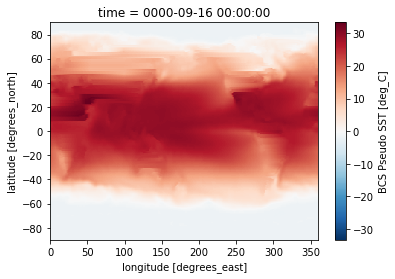

In [9]:
SSTICE_DATA.SST_cpl.isel(time=8).plot()

In [10]:
ds.SST_cpl.isel(time=9)

<xarray.DataArray 'SST_cpl' (lat: 384, lon: 320)>
[122880 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 320.6 321.7 322.8 323.9 ... 316.1 317.2 318.3 319.4
  * lat      (lat) float64 -79.22 -79.22 -79.22 -79.22 ... 1e+30 1e+30 1e+30
    time     object 0000-10-16 12:00:00
Attributes:
    long_name:  BCS Pseudo SST
    units:      deg_C

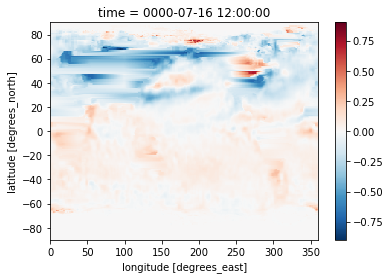

In [11]:
# plotting the difference from diddle
diddle_delta_SST = SSTICE_DATA.SST_cpl_prediddle - SSTICE_DATA.SST_cpl
diddle_delta_SST.isel(time=6).plot()

In [12]:
ds.lon

<xarray.DataArray 'lon' (lon: 320)>
array([320.5625, 321.6875, 322.8125, ..., 317.1875, 318.3125, 319.4375])
Coordinates:
  * lon      (lon) float64 320.6 321.7 322.8 323.9 ... 316.1 317.2 318.3 319.4
Attributes:
    long_name:  longitude
    units:      degrees_east

In [13]:
## get SST, fhocn, aice data from the original and adjusted SST DOM runs
dom_sst_path = '/glade/u/home/vcooper/work/som2dom/SSToutput/'
dom_sst_orig = xr.open_dataset(dom_sst_path + 'domtestfln.cice.h.sst.003101-003112.nc')
dom_sst_adj = xr.open_dataset(dom_sst_path + 'domadjfln_v2.cice.h.sst.000101-000512.nc')

dom_fhocn_orig = xr.open_dataset(dom_sst_path + 'domtestfln.cice.h.fhocn.000101-003012.nc')
dom_fhocn_adj = xr.open_dataset(dom_sst_path + 'domadjfln_v2.cice.h.fhocn.000101-000512.nc')

# dom_aice_orig = xr.open_dataset(dom_sst_path + 'domtestfln.cice.h.aice.000101-003012.nc')
# dom_aice_adj = xr.open_dataset(dom_sst_path + 'domadjfln_v2.cice.h.aice.000101-000512.nc')

In [14]:
dom_sst_orig

<xarray.Dataset>
Dimensions:      (d2: 2, nc: 5, ni: 320, nj: 384, nkbio: 5, nkice: 8, nksnow: 3, nvertices: 4, time: 12)
Coordinates:
    TLAT         (nj, ni) float32 ...
    TLON         (nj, ni) float32 ...
    ULAT         (nj, ni) float32 ...
    ULON         (nj, ni) float32 ...
  * time         (time) object 0031-02-01 00:00:00 ... 0032-01-01 00:00:00
Dimensions without coordinates: d2, nc, ni, nj, nkbio, nkice, nksnow, nvertices
Data variables:
    ANGLE        (nj, ni) float32 ...
    ANGLET       (nj, ni) float32 ...
    HTE          (nj, ni) float32 ...
    HTN          (nj, ni) float32 ...
    NCAT         (nc) float32 ...
    VGRDb        (nkbio) float32 ...
    VGRDi        (nkice) float32 ...
    VGRDs        (nksnow) float32 ...
    dxt          (nj, ni) float32 ...
    dxu          (nj, ni) float32 ...
    dyt          (nj, ni) float32 ...
    dyu          (nj, ni) float32 ...
    latt_bounds  (nj, ni, nvertices) float32 ...
    latu_bounds  (nj, ni, nvertices) float32 ...
    lont_bounds  (nj, ni, nvertices) float32 ...
    lonu_bounds  (nj, ni, nvertices) float32 ...
    sst          (time, nj, ni) float32 ...
    tarea        (nj, ni) float32 ...
    time_bounds  (time, d2) object ...
    tmask        (nj, ni) float32 ...
    uarea        (nj, ni) float32 ...
Attributes:
    title:             domtestfln
    contents:          Diagnostic and Prognostic Variables
    source:            Los Alamos Sea Ice Model (CICE) Version 5
    time_period_freq:  month_1
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    comment:           All years have exactly 365 days
    comment2:          File written on model date 00310201
    comment3:          seconds elapsed into model date:      0
    conventions:       CF-1.0
    history:           Mon Dec  9 13:51:49 2019: ncrcat domtestfln.cice.h.sst...
    io_flavor:         io_pio
    NCO:               netCDF Operators version 4.7.9 (Homepage = http://nco....

In [15]:
dom_sst_adj

<xarray.Dataset>
Dimensions:      (d2: 2, nc: 5, ni: 320, nj: 384, nkbio: 5, nkice: 8, nksnow: 3, nvertices: 4, time: 60)
Coordinates:
    TLON         (nj, ni) float32 ...
    TLAT         (nj, ni) float32 ...
    ULON         (nj, ni) float32 ...
    ULAT         (nj, ni) float32 ...
  * time         (time) object 0001-02-01 00:00:00 ... 0006-01-01 00:00:00
Dimensions without coordinates: d2, nc, ni, nj, nkbio, nkice, nksnow, nvertices
Data variables:
    NCAT         (nc) float32 ...
    VGRDi        (nkice) float32 ...
    VGRDs        (nksnow) float32 ...
    VGRDb        (nkbio) float32 ...
    tmask        (nj, ni) float32 ...
    tarea        (nj, ni) float32 ...
    uarea        (nj, ni) float32 ...
    dxt          (nj, ni) float32 ...
    dyt          (nj, ni) float32 ...
    dxu          (nj, ni) float32 ...
    dyu          (nj, ni) float32 ...
    HTN          (nj, ni) float32 ...
    HTE          (nj, ni) float32 ...
    ANGLE        (nj, ni) float32 ...
    ANGLET       (nj, ni) float32 ...
    lont_bounds  (nj, ni, nvertices) float32 ...
    latt_bounds  (nj, ni, nvertices) float32 ...
    lonu_bounds  (nj, ni, nvertices) float32 ...
    latu_bounds  (nj, ni, nvertices) float32 ...
    time_bounds  (time, d2) object ...
    sst          (time, nj, ni) float32 ...
Attributes:
    title:             domadjfln_v2
    contents:          Diagnostic and Prognostic Variables
    source:            Los Alamos Sea Ice Model (CICE) Version 5
    time_period_freq:  month_1
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    comment:           All years have exactly 365 days
    comment2:          File written on model date 00010201
    comment3:          seconds elapsed into model date:      0
    conventions:       CF-1.0
    history:           This dataset was created on 2019-11-27 at 13:29
    io_flavor:         io_pio

In [16]:
dom_sst_orig.isel(time=8)

<xarray.Dataset>
Dimensions:      (d2: 2, nc: 5, ni: 320, nj: 384, nkbio: 5, nkice: 8, nksnow: 3, nvertices: 4)
Coordinates:
    TLAT         (nj, ni) float32 ...
    TLON         (nj, ni) float32 ...
    ULAT         (nj, ni) float32 ...
    ULON         (nj, ni) float32 ...
    time         object 0031-10-01 00:00:00
Dimensions without coordinates: d2, nc, ni, nj, nkbio, nkice, nksnow, nvertices
Data variables:
    ANGLE        (nj, ni) float32 ...
    ANGLET       (nj, ni) float32 ...
    HTE          (nj, ni) float32 ...
    HTN          (nj, ni) float32 ...
    NCAT         (nc) float32 ...
    VGRDb        (nkbio) float32 ...
    VGRDi        (nkice) float32 ...
    VGRDs        (nksnow) float32 ...
    dxt          (nj, ni) float32 ...
    dxu          (nj, ni) float32 ...
    dyt          (nj, ni) float32 ...
    dyu          (nj, ni) float32 ...
    latt_bounds  (nj, ni, nvertices) float32 ...
    latu_bounds  (nj, ni, nvertices) float32 ...
    lont_bounds  (nj, ni, nvertices) float32 ...
    lonu_bounds  (nj, ni, nvertices) float32 ...
    sst          (nj, ni) float32 ...
    tarea        (nj, ni) float32 ...
    time_bounds  (d2) object ...
    tmask        (nj, ni) float32 ...
    uarea        (nj, ni) float32 ...
Attributes:
    title:             domtestfln
    contents:          Diagnostic and Prognostic Variables
    source:            Los Alamos Sea Ice Model (CICE) Version 5
    time_period_freq:  month_1
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    comment:           All years have exactly 365 days
    comment2:          File written on model date 00310201
    comment3:          seconds elapsed into model date:      0
    conventions:       CF-1.0
    history:           Mon Dec  9 13:51:49 2019: ncrcat domtestfln.cice.h.sst...
    io_flavor:         io_pio
    NCO:               netCDF Operators version 4.7.9 (Homepage = http://nco....

In [17]:
dom_sst_adj.isel(time=8)

<xarray.Dataset>
Dimensions:      (d2: 2, nc: 5, ni: 320, nj: 384, nkbio: 5, nkice: 8, nksnow: 3, nvertices: 4)
Coordinates:
    TLON         (nj, ni) float32 ...
    TLAT         (nj, ni) float32 ...
    ULON         (nj, ni) float32 ...
    ULAT         (nj, ni) float32 ...
    time         object 0001-10-01 00:00:00
Dimensions without coordinates: d2, nc, ni, nj, nkbio, nkice, nksnow, nvertices
Data variables:
    NCAT         (nc) float32 ...
    VGRDi        (nkice) float32 ...
    VGRDs        (nksnow) float32 ...
    VGRDb        (nkbio) float32 ...
    tmask        (nj, ni) float32 ...
    tarea        (nj, ni) float32 ...
    uarea        (nj, ni) float32 ...
    dxt          (nj, ni) float32 ...
    dyt          (nj, ni) float32 ...
    dxu          (nj, ni) float32 ...
    dyu          (nj, ni) float32 ...
    HTN          (nj, ni) float32 ...
    HTE          (nj, ni) float32 ...
    ANGLE        (nj, ni) float32 ...
    ANGLET       (nj, ni) float32 ...
    lont_bounds  (nj, ni, nvertices) float32 ...
    latt_bounds  (nj, ni, nvertices) float32 ...
    lonu_bounds  (nj, ni, nvertices) float32 ...
    latu_bounds  (nj, ni, nvertices) float32 ...
    time_bounds  (d2) object ...
    sst          (nj, ni) float32 ...
Attributes:
    title:             domadjfln_v2
    contents:          Diagnostic and Prognostic Variables
    source:            Los Alamos Sea Ice Model (CICE) Version 5
    time_period_freq:  month_1
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    comment:           All years have exactly 365 days
    comment2:          File written on model date 00010201
    comment3:          seconds elapsed into model date:      0
    conventions:       CF-1.0
    history:           This dataset was created on 2019-11-27 at 13:29
    io_flavor:         io_pio

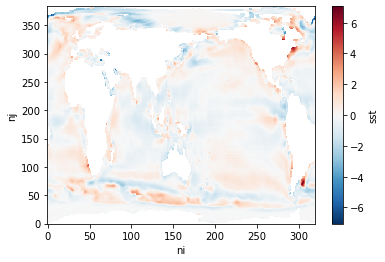

In [18]:
# comparison of SST in domadjfln_v2 versus domtestfln -- this confirms different SSTs in the domadjfln_v2 run
temp = dom_sst_adj.isel(time=8).sst - dom_sst_orig.isel(time=8).sst
temp.plot()

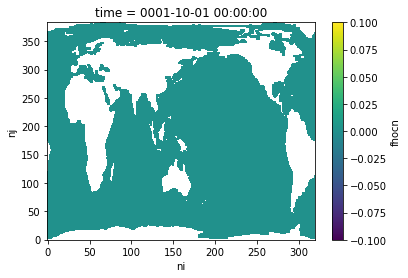

In [19]:
# comparison of fhocn in domadjfln_v2 versus domtestfln -- this confirms identical fhocn in the domadjfln_v2 run
temp = dom_fhocn_adj.isel(time=8).fhocn - dom_fhocn_orig.isel(time=8).fhocn
temp.plot(vmin=-0.1,vmax=0.1)

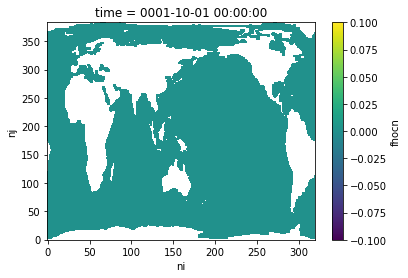

In [20]:
# comparison of hi in domadjfln_v2 versus domtestfln -- this confirms identical fhocn in the domadjfln_v2 run
temp = dom_fhocn_adj.isel(time=8).fhocn - dom_fhocn_orig.isel(time=8).fhocn
temp.plot(vmin=-0.1,vmax=0.1)

In [21]:
# double-checking that difference between runs is zero
diff = dom_fhocn_adj.isel(time=8).fhocn - dom_fhocn_orig.isel(time=8).fhocn
print(' mean diff =',diff.mean().values,'\n','std dev =',diff.std().values)

 mean diff = 0.0 
 std dev = 0.0


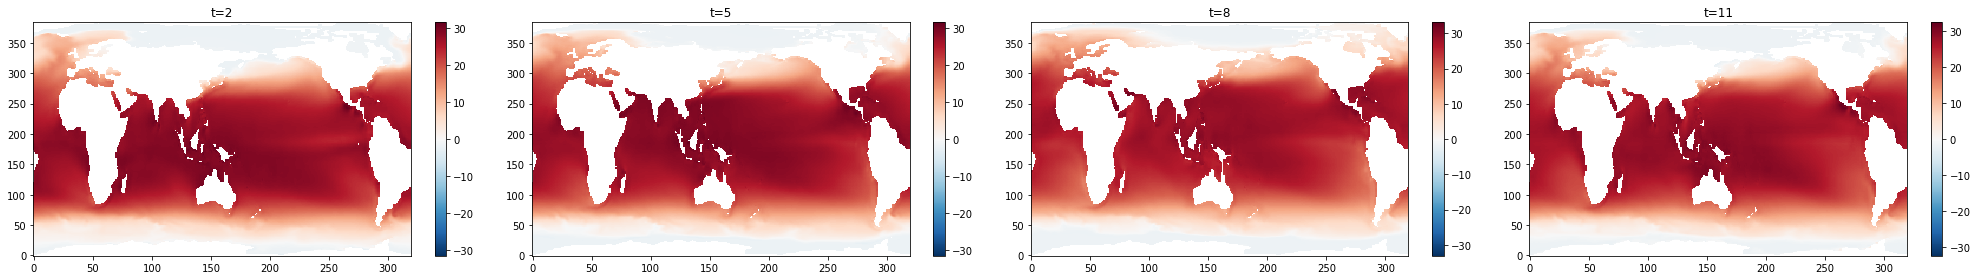

In [22]:
## Create plots of SST from adjusted SST run
fig, axes = plt.subplots(ncols=4, nrows=1, figsize=(28,4))
fig.subplots_adjust(hspace=0.4,wspace=0.25)

timeselect = ([2,5,8,11]) # defined once here
j=0
s='00'
for i in timeselect:
    dom_sst_adj.isel(time=i).sst.plot(ax=axes[j],add_labels=False)
    axes[j].set_title("t={0}".format(i))
    j+=1

plt.tight_layout()

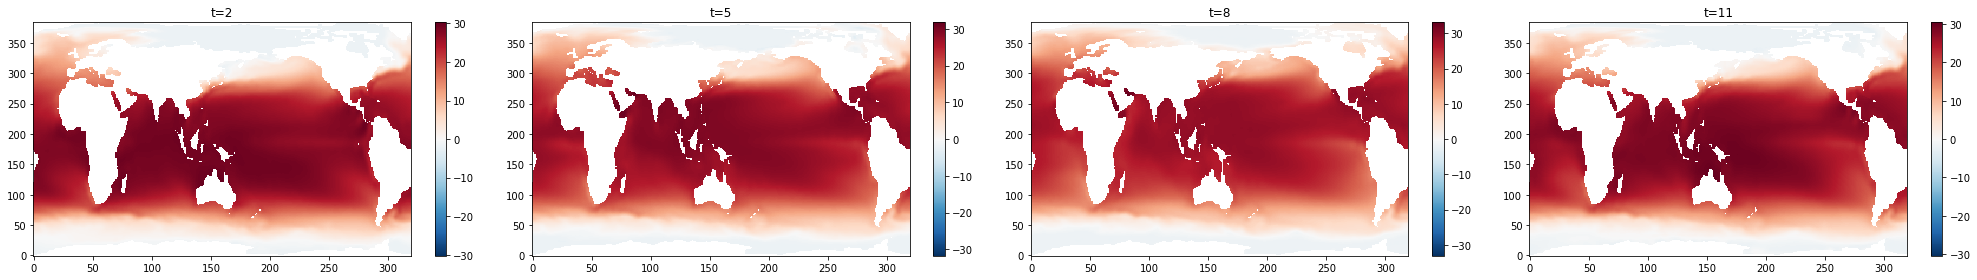

In [23]:
## Create plots of SST from default SST run
fig, axes = plt.subplots(ncols=4, nrows=1, figsize=(28,4))
fig.subplots_adjust(hspace=0.4,wspace=0.25)

timeselect = ([2,5,8,11]) # defined once here
j=0
for i in timeselect:
    dom_sst_orig.isel(time=i).sst.plot(ax=axes[j],add_labels=False)
    axes[j].set_title("t={0}".format(i))
    j+=1

plt.tight_layout()

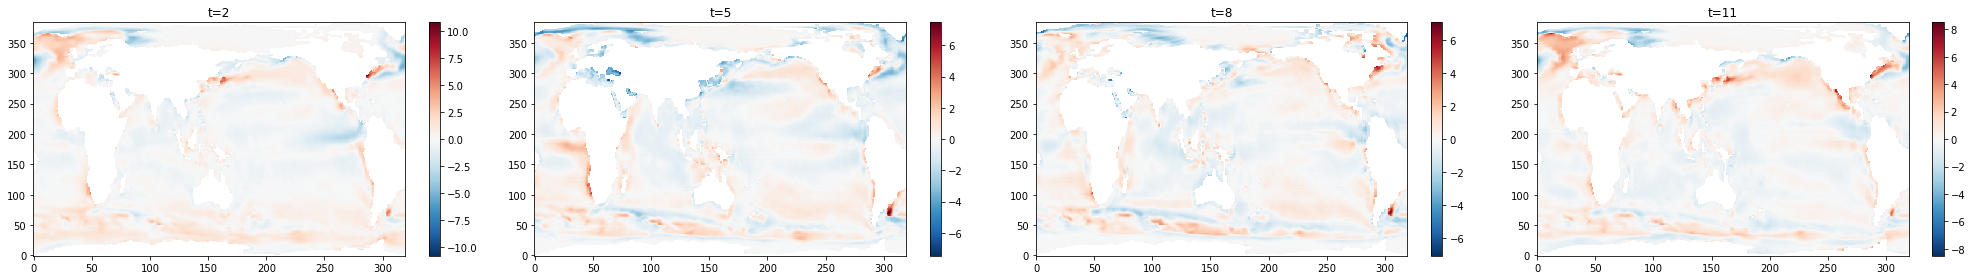

In [24]:
## Create plots of delta in SST between adjusted and default SST runs
fig, axes = plt.subplots(ncols=4, nrows=1, figsize=(28,4))
fig.subplots_adjust(hspace=0.4,wspace=0.25)

timeselect = ([2,5,8,11]) # defined once here
j=0
for i in timeselect:
    temp = dom_sst_adj.sst.isel(time=i) - dom_sst_orig.sst.isel(time=i)
    temp.plot(ax=axes[j],add_labels=False)
    axes[j].set_title("t={0}".format(i))
    j+=1

plt.tight_layout()

In [25]:
dom_sst_orig.sst.isel(time=0).mean() - dom_sst_adj.sst.isel(time=0).mean()


<xarray.DataArray 'sst' ()>
array(-0.09052658, dtype=float32)

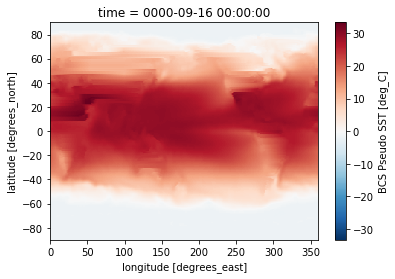

In [26]:
# to-do: regrid this default input data file onto the model grid
# see whether it matches perfectly with the model run to confirm that the model is using this file for SSTs
# however, this would not answer the question of what SSTs are actually impacting the ice
# because we already know that different SST input files are producing identical ice
SSTICE_DATA.SST_cpl.isel(time=8).plot()

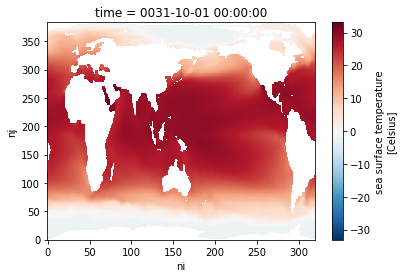

In [26]:
dom_sst_orig.isel(time=8).sst.plot()

In [27]:
dom_sst_adj.sst.isel(time=12)

<xarray.DataArray 'sst' (nj: 384, ni: 320)>
[122880 values with dtype=float32]
Coordinates:
    TLON     (nj, ni) float32 ...
    TLAT     (nj, ni) float32 ...
    ULON     (nj, ni) float32 ...
    ULAT     (nj, ni) float32 ...
    time     object 0002-02-01 00:00:00
Dimensions without coordinates: nj, ni
Attributes:
    units:          Celsius
    long_name:      sea surface temperature
    cell_measures:  area: tarea
    cell_methods:   time: mean
    time_rep:       averaged

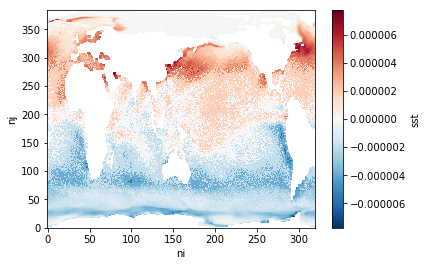

In [28]:
# confirming that adjusted SST output is annually periodic -- it is NOT consistent across years
temp = dom_sst_adj.sst.isel(time=0) - dom_sst_adj.sst.isel(time=12)
temp.plot()

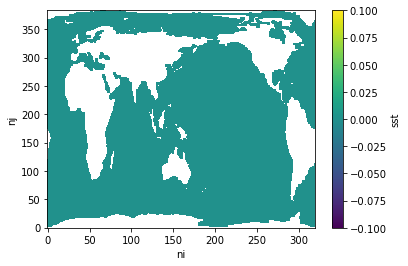

In [29]:
temp = dom_sst_adj.sst.isel(time=1) - dom_sst_adj.sst.isel(time=13)
temp.plot()

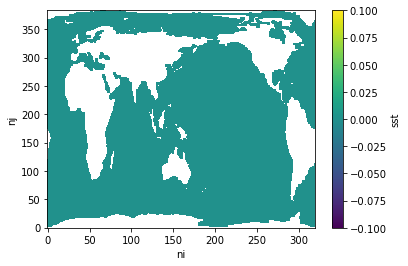

In [30]:
temp = dom_sst_adj.sst.isel(time=12) - dom_sst_adj.sst.isel(time=24)
temp.plot()